Transition Matrix for k = 2:
[[0.5 0.5 0. ]
 [0.5 0.5 0.5]
 [0.  0.5 0.5]]


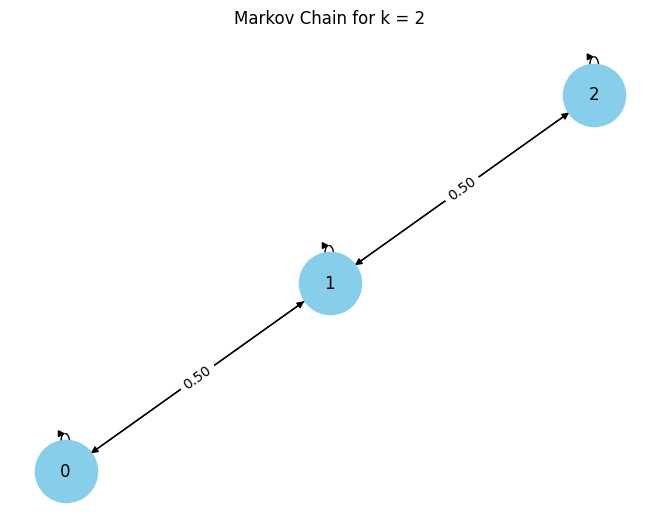

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def generate_transition_matrix(k):
    num_states = k + 1
    P = np.zeros((num_states, num_states))

    for i in range(num_states):
        for j in range(num_states):
            if i == j:
                P[i, j] = 1/2
            elif abs(i - j) == 1:
                P[i, j] = 1/2

    return P

def draw_markov_chain_graph(P, k):
    states = list(range(k + 1))
    G = nx.DiGraph()
    G.add_nodes_from(states)

    for i in range(len(states)):
        for j in range(len(states)):
            if P[i, j] > 0:
                G.add_edge(states[i], states[j], weight=P[i, j])

    pos = nx.spring_layout(G)
    labels = {(i, j): P[i, j] for i in range(len(states)) for j in range(len(states)) if P[i, j] > 0}
    edge_labels = {(i, j): f"{P[i, j]:.2f}" for i in range(len(states)) for j in range(len(states)) if P[i, j] > 0}

    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', labels={node: node for node in G.nodes()})
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Markov Chain for k = {k}")
    plt.show()

# Example usage for k = 2
k = 2
transition_matrix = generate_transition_matrix(k)
print("Transition Matrix for k = 2:")
print(transition_matrix)

draw_markov_chain_graph(transition_matrix, k)


In [ ]:
def is_irreducible(P):
    num_states = P.shape[0]
    gcd_values = set()

    for i in range(num_states):
        for j in range(num_states):
            if P[i, j] > 0:
                gcd_values.add(abs(i - j))

    gcd_result = 1 if len(gcd_values) == 1 else np.gcd.reduce(list(gcd_values))
    return gcd_result == 1

# Example usage for k = 2
k = 2
transition_matrix = generate_transition_matrix(k)
print("Is P irreducible for k = 2?", is_irreducible(transition_matrix))


Is P irreducible for k = 2? True


In [ ]:
def is_aperiodic(P):
    num_states = P.shape[0]
    cycle_lengths = []

    for i in range(num_states):
        if P[i, i] > 0:
            cycle_length = 1
            j = i
            while P[j, i] == 0 or i != j:
                j = np.argmax(P[j, :])
                cycle_length += 1
            cycle_lengths.append(cycle_length)

    gcd_result = np.gcd.reduce(cycle_lengths)
    return gcd_result == 1

k = 2
transition_matrix = generate_transition_matrix(k)
is_irreducible_result = is_irreducible(transition_matrix)
is_aperiodic_result = is_aperiodic(transition_matrix)

if is_irreducible_result and is_aperiodic_result:
    print("P^n converges as n → ∞ for k =", k)
else:
    print("P^n does not converge as n → ∞ for k =", k)


P^n converges as n → ∞ for k = 2


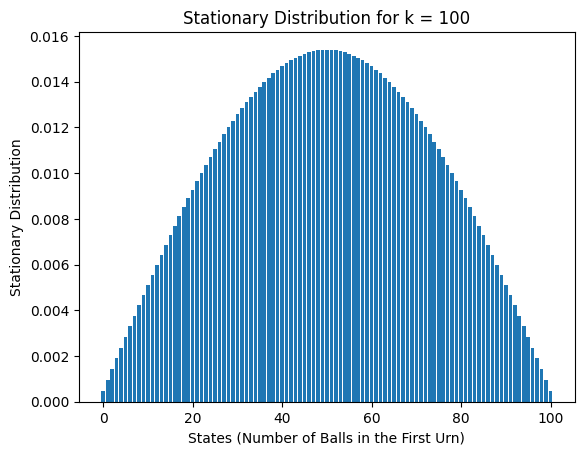

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_stationary_distribution(P):
    # Use the eigenvector corresponding to the eigenvalue 1 to find the stationary distribution
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    stationary_distribution = np.real(eigenvectors[:, np.argmax(eigenvalues == 1)])

    # Normalize the stationary distribution to sum to 1
    stationary_distribution /= np.sum(stationary_distribution)

    return stationary_distribution

# Define k
k = 100
transition_matrix = generate_transition_matrix(k)

# Calculate the stationary distribution
stationary_distribution = calculate_stationary_distribution(transition_matrix)

# Plot the stationary distribution
states = list(range(k + 1))
plt.bar(states, stationary_distribution)
plt.xlabel("States (Number of Balls in the First Urn)")
plt.ylabel("Stationary Distribution")
plt.title(f"Stationary Distribution for k = {k}")
plt.show()

